# DataHack: Detecting Fake Reviews

This Colab notebook demonstrates how to load the dataset, perform basic exploratory analysis, and use a sentiment analysis model on the review data.


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "full_data (1).csv"
data = pd.read_csv(url)


## Exploratory Data Analysis

Let's begin by exploring the dataset to understand its structure, content, and distribution of values.


In [ ]:
# Display first few rows of the dataset
data.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,llm
0,c23c3405-0e6f-44d5-b8bd-cf3ae7af7507,ed4114b9-858d-446b-b959-0c3ea0cda107,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014",False
1,43451c1d-99bc-4656-ad09-78bc3c2bb5b1,ed4114b9-858d-446b-b959-0c3ea0cda107,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,1397779200,"04 18, 2014",False
2,34307dbe-a180-4cbe-a928-0554828a66a8,ed4114b9-858d-446b-b959-0c3ea0cda107,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,1378425600,"09 6, 2013",False
3,61400f04-a1b6-41ba-a2ee-297580fe5939,ed4114b9-858d-446b-b959-0c3ea0cda107,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,1386460800,"12 8, 2013",False
4,df6d6c81-6817-46d9-8fed-03bc278c95b6,ed4114b9-858d-446b-b959-0c3ea0cda107,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,1382140800,"10 19, 2013",False


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204055 entries, 0 to 204054
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      204055 non-null  object 
 1   asin            204055 non-null  object 
 2   reviewerName    202661 non-null  object 
 3   helpful         204055 non-null  object 
 4   reviewText      204028 non-null  object 
 5   overall         204055 non-null  float64
 6   summary         204054 non-null  object 
 7   unixReviewTime  204055 non-null  int64  
 8   reviewTime      204055 non-null  object 
 9   llm             204055 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 14.2+ MB
None


In [ ]:
# Summary statistics
data.describe()


,overall,unixReviewTime
count,204055.000000,2.040550e+05
mean,4.192044,1.364476e+09
std,1.159782,3.837085e+07
min,0.000000,1.023840e+09
25%,4.000000,1.354493e+09
50%,5.000000,1.372205e+09
75%,5.000000,1.391213e+09
max,5.000000,1.406074e+09


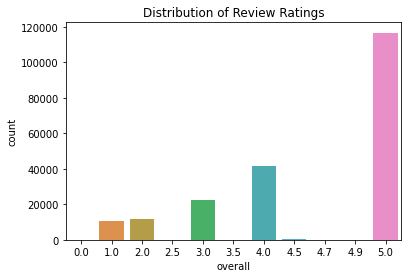

In [ ]:
# Distribution of review ratings
sns.countplot(x="overall", data=data)
plt.title("Distribution of Review Ratings")
plt.show()


## Sentiment Analysis

We will use the Hugging Face Transformers library to load a pre-trained sentiment analysis model and apply it to our reviews.


In [ ]:
# Install Hugging Face Transformers library
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.4 MB/s eta 0:00:00


In [ ]:
# Import required libraries
from transformers import pipeline

# Load sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")


Let's apply the sentiment analysis model to a few example reviews from the dataset.


In [ ]:
# Function to calculate sentiment for a given review
def analyze_sentiment(review):
    result = sentiment_model(review)[0]
    return result["label"], result["score"]

# Apply sentiment analysis to a few example reviews
example_reviews = data["reviewText"].head(5)
sentiments = [analyze_sentiment(review) for review in example_reviews]

for i, (review, sentiment) in enumerate(zip(example_reviews, sentiments)):
    print(f"Review {i + 1}:")
    print(f"Text: {review}")
    print(f"Sentiment: {sentiment[0]}, Score: {sentiment[1]:.2f}")
    print()
